In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [3]:
logflist = os.listdir("log")
ompset = ['8OMP','4OMP','2OMP','1OMP']
dummy = 'Sustained BandWidth (GB/s)'

In [5]:
print(ompset)

['8OMP', '4OMP', '2OMP', '1OMP']


In [10]:
def getbdandtime(filename):
    f= open('log/'+filename, 'r')
    while 1:
        line = f.readline()
        if not line:
            break
        if line.startswith('Time'):
            timedata = f.readline().split(' ')
            timedata = [float(x) for x in timedata]
        if line.startswith("BW"):
            bddata = f.readline().split(' ')
            bddata = [float(x) for x in bddata]
    avgtime = np.average(np.array(timedata))
    avgbd = np.average(np.array(bddata))
    return avgtime, avgbd


In [12]:
tilesize=150
omp = ompset[0]
timelist = []
bdlist = []
for i in [1,2,4,8]:
    prefix='NEW1_{}VE_4800_19200_{}'.format(i,tilesize)
    print(prefix)
    for file in logflist:
        if file.startswith(prefix) and omp in file:
            print(file)
            tmpt,tmpbd = (getbdandtime(file))
            timelist.append(tmpt)
            bdlist.append(tmpbd)


NEW1_1VE_4800_19200_150
NEW1_1VE_4800_19200_150_1MPI_8OMP.a2_20B.676589.log
NEW1_2VE_4800_19200_150
NEW1_2VE_4800_19200_150_2MPI_8OMP.a2_20B.676593.log
NEW1_4VE_4800_19200_150
NEW1_4VE_4800_19200_150_4MPI_8OMP.a2_20B.676597.log
NEW1_8VE_4800_19200_150
NEW1_8VE_4800_19200_150_8MPI_8OMP.a2_20B.676601.log


In [13]:
print(timelist)

[0.00020798635999999995, 0.00012812046, 9.786953800000003e-05, 9.5735248e-05]


In [14]:
print(bdlist)

[892.9167199999999, 1444.801, 1888.3004, 1929.0456]


In [18]:
timearr

array([1.        , 0.61600415, 0.47055748, 0.4602958 ])

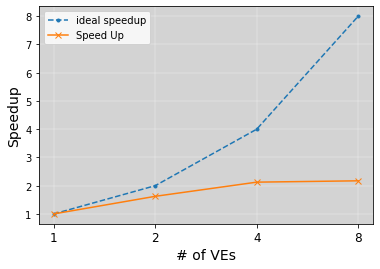

In [25]:
fig, ax = plt.subplots()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.0001)
ax.set_ylabel('Speedup', fontsize=14)
timearr = np.array(timelist)
timearr = timearr[0] / timearr
plt.plot([1,2,4,8],linestyle='dashed',label='ideal speedup',marker='.')
plt.plot(timearr,marker='x',label='Speed Up')
# ax1.set_facecolor('lightgrey')
# ax1.set_alpha(0.0001)
xtick = ['1','2','4','8']
plt.grid(which='both', color='white', linewidth='0.3')
plt.xlabel("# of VEs", fontsize=14)
# plt.title('{} - MVM Scalability on NEC SX-Aurora TSUBASA 20B'.format(instrs[instridx]))
plt.xticks(range(len(xtick)), xtick,fontsize=12)
plt.legend()
plt.savefig('plots/speedup/speedup.pdf')
plt.show()
